### Decision tree classifier for moons dataset

In [1]:
from sklearn.datasets import make_moons

?make_moons


Signature: make_moons(n_samples=100, shuffle=True, noise=None, random_state=None)
Docstring:
Make two interleaving half circles

A simple toy dataset to visualize clustering and classification
algorithms. Read more in the :ref:`User Guide <sample_generators>`.

Parameters
----------
n_samples : int, optional (default=100)
    The total number of points generated.

shuffle : bool, optional (default=True)
    Whether to shuffle the samples.

noise : double or None (default=None)
    Standard deviation of Gaussian noise added to the data.

random_state : int, RandomState instance or None (default)
    Determines random number generation for dataset shuffling and noise.
    Pass an int for reproducible output across multiple function calls.
    See :term:`Glossary <random_state>`.

Returns
-------
X : array of shape [n_samples, 2]
    The generated samples.

y : array of shape [n_samples]
    The integer labels (0 or 1) for class membership of each sample.
File:      ~/anaconda3/envs/ml/li

In [2]:
X, y = make_moons(n_samples=10000, noise=0.4, random_state=42)

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

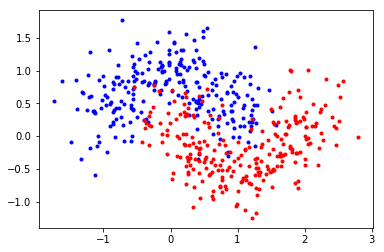

In [4]:
plt.plot(X[(y == 0), 0], X[(y == 0), 1], 'b.')
plt.plot(X[(y == 1), 0], X[(y == 1), 1], 'r.')


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

tree_clf = DecisionTreeClassifier(random_state=42)

param_grid = [
    {'max_leaf_nodes': [10, 100, 1000, 10000]},
    {'criterion': ['gini', 'entropy']}
]

grid_search = GridSearchCV(tree_clf, param_grid, cv=3, n_jobs=3)

grid_search.fit(X_train, y_train)


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=3,
       param_grid=[{'max_leaf_nodes': [10, 100, 1000, 10000]}, {'criterion': ['gini', 'entropy']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [7]:
grid_search.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=10,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [8]:
tree_clf = DecisionTreeClassifier(max_leaf_nodes=10, random_state=42)

tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=10,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [9]:
tree_clf.score(X_test, y_test)

0.872

### Grow a forest

In [10]:
from sklearn.model_selection import ShuffleSplit

n_trees = 1000
n_instances = 100

mini_sets = []

rs = ShuffleSplit(n_splits=n_trees, test_size=len(X_train) - n_instances, random_state=42)
for mini_train_index, mini_test_index in rs.split(X_train):
    X_mini_train = X_train[mini_train_index]
    y_mini_train = y_train[mini_train_index]
    mini_sets.append((X_mini_train, y_mini_train))